In [51]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.io as scio

%matplotlib inline 

Importing all the libraries

## 10 part 1

going to start by generating a dataset for which I know an approximate regression

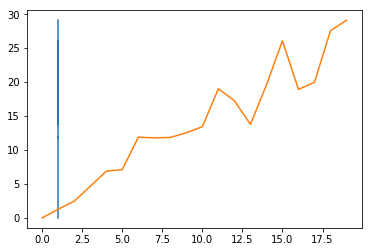

In [107]:

X_trn = []
for i in range(20):
    X_trn.append([1,i])
    

sp.random.seed(123)    
Y_trn = []
for i in range(len(X_trn)):
    Y_trn.append(X_trn[i][1] * (sp.rand(1) + 1))
    

    
plt.plot(X_trn, Y_trn)

In [108]:
def computeCost(X, Y, theta):
    
    cost = (np.linalg.norm(X*theta - Y))
    cost = cost*cost
    print("cost: ", cost)
    return cost
    

In [120]:
def gradientDescent(X, Y, theta, lrnRate, ittr):
    print(X, Y, theta, lrnRate)
    
    m = len(Y)
    costs = [0] * ittr
    
    for i in range(ittr):
        theta = theta - (lrnRate * (X.T * ((X * theta) - Y)))
       # print("theta: ", theta)
        costs[i] = computeCost(X,Y,theta)
        
        #print(costs)
    return theta

In [121]:
m = len(X_trn)  # number of training samples (should be 20)
itterations = 10
lrnRate = 0.5
X = np.mat(X_trn)
Y = np.mat(Y_trn)
theta = np.mat('[1;1]')

theta = gradientDescent(X, Y, theta, lrnRate, itterations)
theta

[[ 1  0]
 [ 1  1]
 [ 1  2]
 [ 1  3]
 [ 1  4]
 [ 1  5]
 [ 1  6]
 [ 1  7]
 [ 1  8]
 [ 1  9]
 [ 1 10]
 [ 1 11]
 [ 1 12]
 [ 1 13]
 [ 1 14]
 [ 1 15]
 [ 1 16]
 [ 1 17]
 [ 1 18]
 [ 1 19]] [[  0.        ]
 [  1.28613933]
 [  2.45370291]
 [  4.65394431]
 [  6.87787588]
 [  7.1155323 ]
 [ 11.88458519]
 [ 11.79380817]
 [ 11.84745521]
 [ 12.52905766]
 [ 13.43178016]
 [ 19.01954678]
 [ 17.26286694]
 [ 13.77581266]
 [ 19.57261957]
 [ 26.06993109]
 [ 18.91986769]
 [ 19.98267985]
 [ 27.56792473]
 [ 29.10472415]] [[1]
 [1]] 0.5
cost:  473244496.82
cost:  7.2921478785e+14
cost:  1.12363553739e+21
cost:  1.7313922344e+27
cost:  2.66787491991e+33
cost:  4.11088628382e+39
cost:  6.33439967982e+45
cost:  9.76057631699e+51
cost:  1.50399177278e+58
cost:  2.31747714391e+64


matrix([[ -2.34740249e+29],
        [ -3.04500989e+30]])

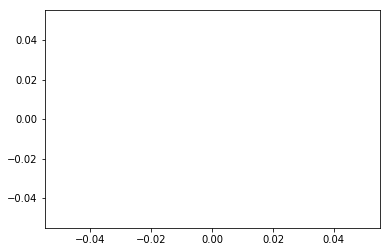

In [79]:
plt.plot(X_trn, Y_trn * theta[0])

## 10 part 2

In [2]:
mat = scio.loadmat('HW1_Data/dataset1.mat')

X_trn = mat['X_trn']
Y_trn = mat['Y_trn']
X_tst = mat['X_tst']
Y_tst = mat['Y_tst']
data = [X_trn,Y_trn,X_tst,Y_tst]

In [3]:
print('shape of the data is [%d, %d]' % X_trn.shape)

shape of the data is [120, 1]


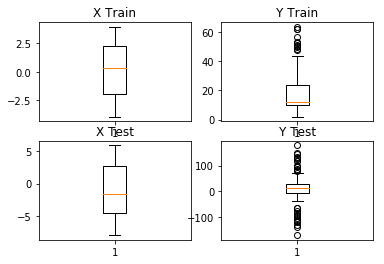

In [4]:
data_labels = ['X Train', 'Y Train', 'X Test', 'Y Test']

for x in range(4):
    plt.subplot(2,2,x +1)
    plt.boxplot(data[x])
    plt.title(data_labels[x])